In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')


In [3]:
housing = pd.read_csv("Housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
cat_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

cat_mapping = {'yes': 1, 'no': 0}

housing[cat_columns] = housing[cat_columns].apply(lambda x: x.map(cat_mapping))

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [5]:
dummy = pd.get_dummies(housing['furnishingstatus'], dtype=int)
dummy

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


In [6]:
dummy = dummy.drop('unfurnished', axis=1)

In [7]:
housing = pd.concat([housing,dummy], axis=1)
housing.drop('furnishingstatus', axis=1, inplace = True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0


In [8]:
# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [9]:
# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Define the columns to be scaled
num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Use the fit_transform method to scale the columns
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,0
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,0,1
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,1,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,1,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,0


In [10]:
y_train = df_train.pop('price')
X_train = df_train

In [11]:
# Create a Linear Regression model (you can choose a different model)
model = LinearRegression()

# Initialize RFE with the model and the desired number of features to select
num_features_to_select = 10  # Adjust this to your desired number of features


rfe = RFE(estimator=model, n_features_to_select=num_features_to_select)

# Fit RFE on the data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Print the selected features
print("Selected Features:")
print(selected_features)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

Selected Features:
Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')


[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 4),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('furnished', False, 3),
 ('semi-furnished', False, 2)]

In [12]:
X_train_rfe = X_train[selected_features]
X_train_rfe_sm = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe_sm)
lm_model = lm.fit()

print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     74.89
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           1.28e-82
Time:                        12:11:17   Log-Likelihood:                 374.65
No. Observations:                 381   AIC:                            -727.3
Df Residuals:                     370   BIC:                            -683.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0027      0.018     

In [13]:
X = X_train_rfe

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Variable,VIF
1,bedrooms,5.85
4,mainroad,5.53
0,area,4.66
3,stories,2.45
8,parking,2.11
7,airconditioning,1.75
2,bathrooms,1.64
9,prefarea,1.47
5,guestroom,1.30
6,hotwaterheating,1.13


In [14]:
X_train_rfe = X_train_rfe.drop(['bedrooms'], axis=1)

X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe_sm)
lm_model = lm.fit()

print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     82.37
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           6.67e-83
Time:                        12:11:17   Log-Likelihood:                 373.00
No. Observations:                 381   AIC:                            -726.0
Df Residuals:                     371   BIC:                            -686.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0242      0.013     

In [15]:
# Fitting the model without const

lm = sm.OLS(y_train,X_train_rfe)
lm_model = lm.fit()

print(lm_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                              417.6
Date:                Wed, 29 Nov 2023   Prob (F-statistic):                   1.99e-188
Time:                        12:11:17   Log-Likelihood:                          371.36
No. Observations:                 381   AIC:                                     -724.7
Df Residuals:                     372   BIC:                                     -689.2
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [16]:
X = X_train_rfe

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Variable,VIF
0,area,4.52
3,mainroad,4.26
2,stories,2.12
7,parking,2.10
6,airconditioning,1.75
1,bathrooms,1.58
8,prefarea,1.47
4,guestroom,1.30
5,hotwaterheating,1.12


In [80]:
y_train_pred = lm_model.predict(X_train_rfe)

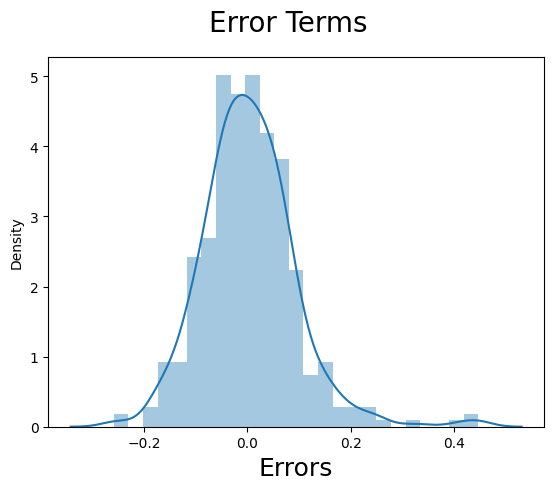

In [86]:
# Importing the required libraries for plots.

sns.distplot((y_train-y_train_pred))
plt.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)
plt.show()

In [87]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

y_test = df_test.pop('price')
X_test = df_test[X_train_rfe.columns]



In [88]:
y_test_pred = lm_model.predict(X_test)

<Axes: ylabel='Density'>

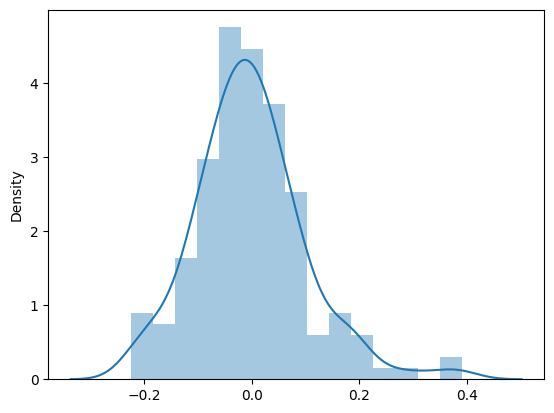

In [89]:
err = y_test - y_test_pred
sns.distplot(err)

Text(0, 0.5, 'y_pred')

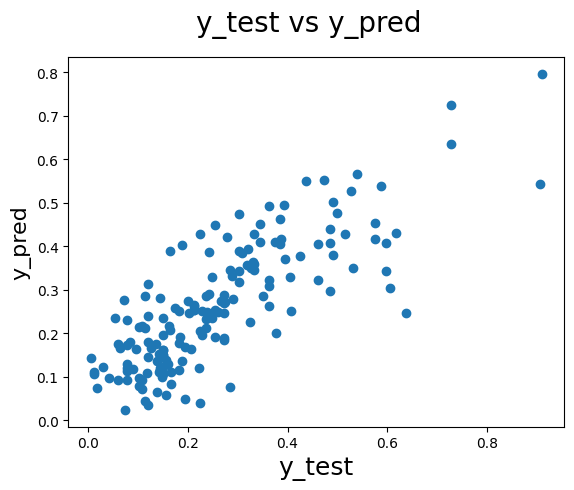

In [90]:
plt.scatter(y_test, y_test_pred)
plt.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)